##### Studi Kasus 1

In [11]:
import requests
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

url = "http://103.82.92.37/DM20232/getdata.php?table=ms_lulusan"

payload={}
headers = {'api-key': 'DM20232UBP'}

response = requests.request("GET", url, headers=headers, data=payload)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data['data'])

    jumlah_data = len(df)
    print("Data yang diterima: ", jumlah_data, '\n')
    print(data)

else:
    print(f"Gagal mengambil data. Status code: {response.status_code}: {response.text}")

Data yang diterima:  4542 

{'message': 'Data berhasil ditemukan.', 'data': [{'nim': '15416226201001', 'prodi': '26201', 'predikat': 'Pujian', 'tanggal_lulus': '2019-08-31', 'tgl_masuk': '2015-09-06', 'status_masuk': 0, 'jenis_kelamin': 1, 'tahun_lahir': 1994, 'status_pegawai': 1}, {'nim': '15416226201002', 'prodi': '26201', 'predikat': 'Pujian', 'tanggal_lulus': '2019-08-31', 'tgl_masuk': '2015-09-06', 'status_masuk': 0, 'jenis_kelamin': 0, 'tahun_lahir': 1996, 'status_pegawai': 1}, {'nim': '15416226201003', 'prodi': '26201', 'predikat': 'Pujian', 'tanggal_lulus': '2019-08-31', 'tgl_masuk': '2015-09-06', 'status_masuk': 0, 'jenis_kelamin': 1, 'tahun_lahir': 1984, 'status_pegawai': 1}, {'nim': '15416226201004', 'prodi': '26201', 'predikat': 'Pujian', 'tanggal_lulus': '2019-08-31', 'tgl_masuk': '2015-09-06', 'status_masuk': 0, 'jenis_kelamin': 1, 'tahun_lahir': 1996, 'status_pegawai': 1}, {'nim': '15416226201005', 'prodi': '26201', 'predikat': 'Pujian', 'tanggal_lulus': '2019-08-31', 't

In [14]:
from datetime import datetime
import pandas as pd

for mahasiswa in data:
    # Mendapatkan tanggal masuk
    tgl_masuk = pd.to_datetime(mahasiswa['tgl_masuk'])
    tanggal_lulus = pd.to_datetime(mahasiswa['tanggal_lulus'])

    lama_kuliah = tanggal_lulus - tgl_masuk

    tahun = lama_kuliah.days // 365
    bulan = (lama_kuliah.days % 365) // 30

    if tahun <= 4:
        print("NIM = ", mahasiswa['nim'], "- Lama kuliah = ", tahun, "tahun", bulan, "bulan")
    else:
        print("NIM = ", mahasiswa['nim'], "- Lama kuliah = ", tahun, "tahun", bulan, "bulan (lulus tidak tepat waktu)")


TypeError: string indices must be integers

In [13]:
import pandas as pd

# Membuat list untuk menyimpan durasi studi setiap mahasiswa
durasi_studi = []

# Melakukan iterasi pada data untuk menghitung durasi studi setiap mahasiswa
for mahasiswa in data:
    # Mengonversi tanggal_masuk dan tanggal_lulus menjadi objek datetime
    tgl_masuk = pd.to_datetime(mahasiswa['tgl_masuk'])
    tanggal_lulus = pd.to_datetime(mahasiswa['tanggal_lulus'])

    # Menghitung durasi studi dalam bulan
    lama_kuliah_bulan = (tanggal_lulus.year - tgl_masuk.year) * 12 + (tanggal_lulus.month - tgl_masuk.month)
    durasi_studi.append(lama_kuliah_bulan)

# Mengonversi list durasi studi menjadi Series pandas
durasi_studi_series = pd.Series(durasi_studi)

# Menghitung rata-rata, median, dan modus
rata_rata_durasi = durasi_studi_series.mean()
median_durasi = durasi_studi_series.median()
modus_durasi = durasi_studi_series.mode()[0]

# Konversi durasi rata-rata, median, dan modus menjadi tahun dan bulan
tahun_rata_rata = int(rata_rata_durasi) // 12
bulan_rata_rata = int(rata_rata_durasi) % 12

tahun_median = int(median_durasi) // 12
bulan_median = int(median_durasi) % 12

tahun_modus = int(modus_durasi) // 12
bulan_modus = int(modus_durasi) % 12

# Menampilkan hasil
print("Rata-rata lama kuliah:", tahun_rata_rata, "tahun", bulan_rata_rata, "bulan")
print("Median lama kuliah:", tahun_median, "tahun", bulan_median, "bulan")
print("Modus lama kuliah:", tahun_modus, "tahun", bulan_modus, "bulan")

TypeError: string indices must be integers

In [ ]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(durasi_studi, bins=range(min(durasi_studi), max(durasi_studi) + 1, 1), edgecolor='black')
plt.title('Distribusi Durasi Studi Mahasiswa')
plt.xlabel('Durasi Studi (bulan)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

In [ ]:
# Pie Chart Menghitung jumlah mahasiswa dalam setiap kategori durasi studi per bulan
kategori_durasi_bulan = pd.cut(durasi_studi_series, bins=range(0, durasi_studi_series.max() + 1, 1), labels=range(1, durasi_studi_series.max() + 1))
jumlah_mahasiswa_per_kategori_bulan = kategori_durasi_bulan.value_counts().sort_index()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(jumlah_mahasiswa_per_kategori_bulan, labels=jumlah_mahasiswa_per_kategori_bulan.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Durasi Studi Mahasiswa (per Bulan)')
plt.show()

##### Studi Kasus 2

In [ ]:
import requests
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

url = "http://103.82.92.37/DM20232/getdata.php?table=ms_lulusan"

payload={}
headers = {'api-key': 'DM20232UBP'}

response = requests.request("GET", url, headers=headers, data=payload)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data['data'])

    jumlah_data = len(df)
    print("Data yang diterima: ", jumlah_data)

else:
    print(f"Gagal mengambil data. Status code: {response.status_code}: {response.text}")


In [ ]:
print("Daftar data lulusan")
df

In [ ]:
# 1. Penanganan nilai hilang (missing value)

df_missing = df.isnull()
jumlah_hilang_perkolom = df_missing.sum(axis=0)
pd.DataFrame(jumlah_hilang_perkolom)

In [ ]:
# 2. Identifikasi baris yang merupakan duplikat dari dataset

duplicate_value = df.duplicated().sum()
duplicate_value

In [ ]:
# 3. Identifikasi dan penanganan outliers
# Menambahkan outlier ke kolom 'tahun_lahir' menggunakan z-score
column = 'tahun_lahir'
z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

threshold = 3
outliers = df[z_scores > threshold]

# Menampilkan jumlah outlier yang ditambahkan
print("Jumlah outliers yang ditambahkan:", len(outliers))

# Menampilkan 10 data outlier
print("Data outlier:")
print(pd.DataFrame(outliers))

import matplotlib.pyplot as plt

# Visualisasi box plot untuk kolom 'tahun_lahir' dengan menandai outlier
plt.figure(figsize=(10, 6))
plt.boxplot(df['tahun_lahir'], vert=False, widths=0.7, patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Tahun Lahir')
plt.xlabel('Tahun Lahir')
plt.show()

In [ ]:
# 4. Identifikasi dan penanganan kesalahan tipe atau ketidaksesuaiaan format

# Menampilkan tipe data untuk setiap kolom
print("Tipe data untuk setiap kolom")
print(df.dtypes)

try:
    df['tanggal_lulus'] = pd.to_datetime(df['tanggal_lulus'])
    df['tgl_masuk'] = pd.to_datetime(df['tgl_masuk'])
    df['status_masuk'] = pd.Categorical(df['status_masuk'])
    df['status_pegawai'] = pd.Categorical(df['status_pegawai'])
except ValueError as e:
    print("Kesalahan konversi tipe data ", e)

# Menampilkan tipe data setelah penanganan
    print("\nTipe data setelah penanganan")
print(df.dtypes)

In [ ]:
# 5. Mengidentifikasi dan menangani anomali atau nilai yang tidak sesuai dengan aturan bisnis atau ilmu pengetahuan

# Menampilkan jumlah data sebelum penanganan 
jumlah_data_sebelum = len(df)
print('jumlah data sebelum penanganan: ', jumlah_data_sebelum)

# Mengganti nilai tahun lahin yang tidak sesuai dengan NaN
tahun_min = 1900
tahun_max = pd.Timestamp.now().year
df.loc[(df['tahun_lahir'] < tahun_min) | (df['tahun_lahir'] > tahun_max), 'tahun_lahir'] = None

# Menampilkan jumlah data setelah penanganan 
jumlah_data_setelah = len(df)
print('jumlah data setelah penanganan: ', jumlah_data_setelah)

# Menampilkan 5 baris pertama DataFrame setelah penanganan
print("\n5 baris pertama DataFrame setelah penanganan: ")
print(df.head())


In [ ]:
# 6. Membersihkan dan memproses data teks, termasuk penghapusan karakter atau stemming

# Download paket 'punkt' untuk tokenisasi kata dan 'wordnet' untuk stemming
nltk.download('punkt')
nltk.download('wordnet')

# Inisialisasi WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Fungsi untuk membersihkan teks
def cleanText(text):
    text = str(text).lower() # ubah menjadi huruf kecil
    text = text.translate(str.maketrans('', '', string.punctuation)) # hapus karakter khusus
    tokens = word_tokenize(text) # tokenisasi kata
    return tokens


# Fungsi untuk melakukan stemming pada kata
def stem_words(words):
    stemmed_words = [lemmatizer.lemmatize(word) for word in words]
    return stemmed_words

# Membersihkan dan memproses data teks pada semua kolom teks 
for column in df.select_dtypes(include=['object']).columns:
    df[column + '_cleaned'] = df[column].apply(cleanText)
    df[column + '_stemmed'] = df[column + '_cleaned'].apply(stem_words)

print("5 baris pertama DataFrame setelah pemrosesan: ")
print(df.head())


##### Studi Kasus 3

In [1]:
import pandas as pd

data_lulusan = pd.read_csv('dataset/ms_lulusan.csv')

df_lulusan = pd.DataFrame(data_lulusan)
df_lulusan

,nim,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201002,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1
2,15416226201003,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1
3,15416226201004,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1
4,15416226201005,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
...,...,...,...,...,...,...,...,...,...
4537,20416261201301,61201,Pujian,2022-10-10,2020-09-09,0,0,1997,0
4538,20416262201064,62201,Pujian,2023-08-31,2020-09-09,0,0,1994,0
4539,20416273201158,73201,Sangat Memuaskan,2024-07-11,2020-09-09,0,1,0,0
4540,20416274201164,74201,Pujian,2022-08-22,2020-09-09,0,0,1997,0


In [5]:
data_transkip = pd.read_excel('dataset/transkip_nilai.xlsx')
df_transkip = pd.DataFrame(data_transkip)
df_transkip

,id,nim,kode_mk,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade,bobot_sks,IPS
0,1,15416255201060,F02160009,Entrepreneurship,Entrepreneurship,Entrepreneurship,3.50,84.25,5,2,B+,7.00,3.68
1,2,15416255201060,F02160010,Kerja Praktik,Kerja Praktik,Internship,3.75,88.25,6,3,A-,11.25,3.68
2,3,15416255201060,IF1160020,Desain & Analisis Algoritma,Desain & Analisis Algoritma,Analysis Algorithm & Design,3.50,81.70,3,3,B+,10.50,3.68
3,4,15416255201060,IF1160021,Analisis & Desain System Berorientasi Obyek,Analisis & Desain System Berorientasi Obyek,Object Oriented Design System,3.75,86.80,3,3,A-,11.25,3.68
4,5,15416255201060,IF1160022,Pemrograman Berorientasi Objek (*),Pemrograman Berorientasi Objek,Object Oriented Programming,3.75,85.50,3,3,A-,11.25,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256294,259312,16416286206133,UBP160004,BAHASA INDONESIA,Bahasa Indonesia,Indonesian,3.75,86.20,2,2,A-,7.50,3.22
256295,259313,16416286206133,UBP160005,JATIDIRI BANGSA,Jatidiri Bangsa,National Identity,3.75,85.25,3,2,A-,7.50,3.22
256296,259314,16416286206133,UBP160006,KKN,KKN,Community Service,3.75,84.55,7,3,A-,11.25,3.22
256297,259315,16416286206133,UBP160007,GENERAL ENGLISH,General English,General English,2.76,70.35,1,2,B-,5.52,3.22


In [7]:
df_merge_transkip = pd.merge(df_lulusan, df_transkip, on='nim', how='left')
df_merge_transkip.head(100)

,nim,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,id,...,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade,bobot_sks,IPS
0,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100310.0,...,Kimia Umum,Kimia Umum,General Chemistry,4.00,90.40,1.0,2.0,A,8.0,3.24
1,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100311.0,...,Pendidikan Agama,Pendidikan Agama,Religious Education,3.75,85.50,1.0,2.0,A-,7.5,3.24
2,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100312.0,...,Material Teknik,Material Teknik,Material Engineering,3.00,76.50,1.0,2.0,B,6.0,3.24
3,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100313.0,...,Pengantar Teknik Industri,Pengantar Teknik Industri,Introduction to Industrial Engineering,3.00,79.25,1.0,2.0,B,6.0,3.24
4,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100314.0,...,Menggambar Teknik + Praktek,Menggambar Teknik + Praktek,Engineering Drawing + Practice,3.00,75.96,1.0,3.0,B,9.0,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15416226201002,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1,6267.0,...,Desain Eksperimen,Desain Eksperimen,Design of Experiment,3.50,75.00,7.0,3.0,B+,10.5,3.43
96,15416226201002,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1,6268.0,...,Sistem Produksi Lanjut,Sistem Produksi Lanjut,Advanced Production Systems\t,4.00,89.50,7.0,3.0,A,12.0,3.43
97,15416226201002,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1,6269.0,...,Material Teknik,Material Teknik,Material Engineering,3.00,75.70,1.0,2.0,B,6.0,3.43
98,15416226201002,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1,6270.0,...,Pengantar Teknik Industri,Pengantar Teknik Industri,Introduction to Industrial Engineering,3.50,83.25,1.0,2.0,B+,7.0,3.43


In [19]:
def hitung_durasi_studi(df):
    
    # Konversi kolom tanggal_lulus dan tgl_masuk kedalam tipe data datetime
    df_lulusan['tanggal_lulus'] = pd.to_datetime(df_lulusan['tanggal_lulus'])
    df_lulusan['tgl_masuk'] = pd.to_datetime(df_lulusan['tgl_masuk'])

    # Kelompokkan data berdasarkan NIM
    grouped = df.groupby('nim')

    durasi_studi_data = []
    
    for (nim), group in grouped:
        # Hitung nilai total (jumlah perkalian nilai dengan SKS) dan jumlah total SKS
        durasi_studi = (group['tanggal_lulus'] - group['tgl_masuk']).sum()
        # Ambil tahun, bulan, dan hari dari objek timedelta
        durasi_studi_years = durasi_studi.days // 365
        
        # Tambahkan data IPS ke list
        durasi_studi_str = f"{durasi_studi_years} tahun"
        durasi_studi_data.append({'nim': nim, 'durasi_studi': durasi_studi_str})
    
    # Buat DataFrame dari list data IPS
    df_durasi_studi = pd.DataFrame(durasi_studi_data)
    return df_durasi_studi

# Hitung IPS untuk data transkrip nilai
durasi_studi = hitung_durasi_studi(df_lulusan)

# Tampilkan hasil
df_durasi_studi = pd.DataFrame(durasi_studi)
df_durasi_studi.drop_duplicates()

df_durasi_studi

,nim,durasi_studi
0,15416226201001,3 tahun
1,15416226201002,3 tahun
2,15416226201003,3 tahun
3,15416226201004,3 tahun
4,15416226201005,3 tahun
...,...,...
4537,20416261201301,2 tahun
4538,20416262201064,2 tahun
4539,20416273201158,3 tahun
4540,20416274201164,1 tahun


In [25]:
df_merge_durasi_studi = pd.merge(df_merge_transkip, df_durasi_studi, on='nim', how='left')
df_merge_durasi_studi

,nim,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,id,...,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade,bobot_sks,IPS,durasi_studi
0,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100310.0,...,Kimia Umum,General Chemistry,4.00,90.40,1.0,2.0,A,8.0,3.24,3 tahun
1,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100311.0,...,Pendidikan Agama,Religious Education,3.75,85.50,1.0,2.0,A-,7.5,3.24,3 tahun
2,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100312.0,...,Material Teknik,Material Engineering,3.00,76.50,1.0,2.0,B,6.0,3.24,3 tahun
3,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100313.0,...,Pengantar Teknik Industri,Introduction to Industrial Engineering,3.00,79.25,1.0,2.0,B,6.0,3.24,3 tahun
4,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,100314.0,...,Menggambar Teknik + Praktek,Engineering Drawing + Practice,3.00,75.96,1.0,3.0,B,9.0,3.24,3 tahun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256310,20416286206132,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,226895.0,...,Bahasa Indonesia,Indonesian,3.75,80.00,1.0,2.0,A-,7.5,3.79,2 tahun
256311,20416286206132,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,226896.0,...,Jatidiri Bangsa,National Identity,3.50,79.45,3.0,2.0,B+,7.0,3.79,2 tahun
256312,20416286206132,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,226897.0,...,KKN,Community Service,4.00,90.00,7.0,3.0,A,12.0,3.79,2 tahun
256313,20416286206132,86206,Pujian,2023-08-29,2020-09-09,0,0,1998,1,226898.0,...,General English,General English,4.00,85.00,1.0,2.0,A,8.0,3.79,2 tahun


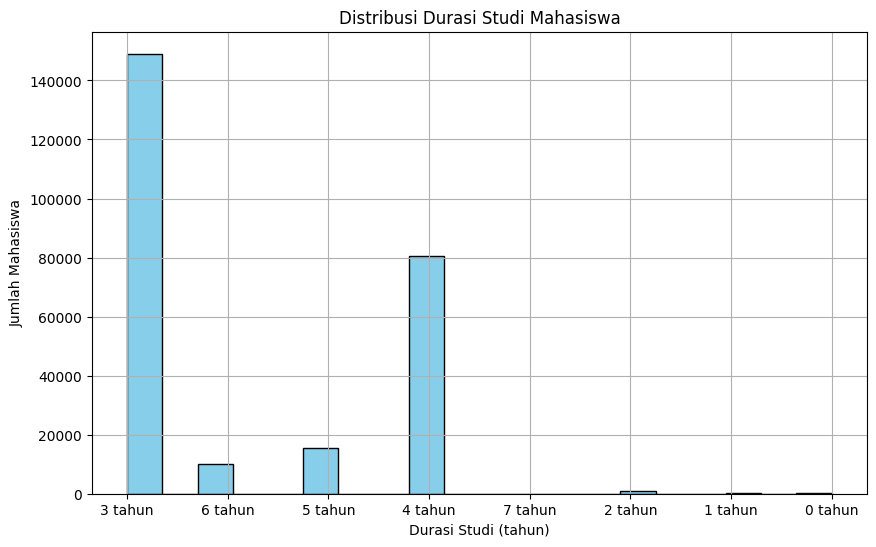

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_merge_durasi_studi['durasi_studi'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribusi Durasi Studi Mahasiswa")
plt.xlabel("Durasi Studi (tahun)")
plt.ylabel("Jumlah Mahasiswa")
plt.grid(True)
plt.show()

In [ ]:
df_merge_transkip = pd.merge( df_lulusan )

In [ ]:
df_lulusan.isnull().sum()

nim               0
prodi             0
predikat          0
tanggal_lulus     0
tgl_masuk         0
status_masuk      0
jenis_kelamin     0
tahun_lahir       0
status_pegawai    0
dtype: int64

In [7]:
df['tanggal_lulus'] = pd.to_datetime(df['tanggal_lulus'])
df['tgl_masuk'] = pd.to_datetime(df['tgl_masuk'])
df['durasi_studi'] = (df['tanggal_lulus'] - df['tgl_masuk']).dt.days // 365

# Analisis berdasarkan faktor-faktor yang diberikan
faktor_analisis = ['prodi', 'jenis_kelamin', 'tahun_lahir', 'status_pegawai']

for faktor in faktor_analisis:
    print(f"Analisis berdasarkan {faktor}")
    print(df.groupby(faktor)['durasi_studi'].mean())
    print("\n")

Analisis berdasarkan prodi
prodi
21201    3.000000
26201    3.695652
48201    3.097826
55201    3.585242
57201    3.265000
61201    3.776636
62201    3.560150
73201    3.443439
74201    3.680597
86206    3.366472
87205    3.900901
Name: durasi_studi, dtype: float64


Analisis berdasarkan jenis_kelamin
jenis_kelamin
0    3.463323
1    3.668984
Name: durasi_studi, dtype: float64


Analisis berdasarkan tahun_lahir
tahun_lahir
0       3.000000
1959    3.000000
1965    4.000000
1966    5.000000
1967    3.000000
1969    4.000000
1970    3.500000
1971    3.500000
1973    3.000000
1974    3.250000
1975    4.333333
1976    3.285714
1977    3.000000
1978    3.857143
1979    3.714286
1980    3.111111
1981    3.714286
1982    3.200000
1983    3.666667
1984    3.750000
1985    3.545455
1986    3.333333
1987    3.200000
1988    3.380952
1989    3.523810
1990    3.352941
1991    4.136364
1992    3.654545
1993    3.596330
1994    3.751351
1995    3.635088
1996    3.739130
1997    3.690209
1998    3.73